
### Steps
* Choose a class of model
* Choose model hyper-parameters 
#### The above two steps are very imp part of machine learning

* Train the model
* Use the model to predict new labels

#### Model Validation
* Is your model good enough for production

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
#model creation
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [7]:
X.shape

(150, 4)

In [9]:
y.shape

(150,)

In [12]:
#model training
model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [14]:
#prediction
y_model = model.predict(X)

In [15]:
#predicted results
y_model

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### To find out, how good our algo is doing - we have to use validation

In [17]:
#finding accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y,y_model)
#100 percent

1.0

In [19]:

import pandas as pd

In [20]:
f = pd.DataFrame(X)

In [22]:
y_actual = pd.DataFrame(y)

In [24]:
y_pred = pd.DataFrame(y_model)

In [29]:
res = pd.concat([f, y_actual, y_pred], axis=1)

In [32]:
res.head()

,0,1,2,3,0,0
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [34]:
res.columns = ['f1','f2','f3','f4','y_actual','y_pred']

In [36]:
res.head()

,f1,f2,f3,f4,y_actual,y_pred
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


#### Ofcourse, you don't want to test model with training data to avoid memorization

In [39]:
from sklearn.model_selection import train_test_split
X1,X2,y1,y2 = train_test_split(X,y, random_state=0, train_size=0.5) 
#Div data into two parts, one part will be used for training & other for validation
#train_size = 0.5 , means 50%

In [41]:
X1.shape

(75, 4)

In [43]:
X2.shape

(75, 4)

In [45]:
y1.shape

(75,)

In [47]:
y2.shape

(75,)

In [49]:
model.fit(X1,y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [51]:
y2_model = model.predict(X2)

In [53]:
y2_model

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0,
       0, 2, 1, 0, 0, 1])

In [57]:

accuracy_score(y2,y2_model)
#90 % accuracy

0.90666666666666662

In [59]:
### Cross Validation
from sklearn.cross_validation import cross_val_score

In [61]:

scores = cross_val_score(model,X,y,cv=5)

In [63]:
scores

array([ 0.96666667,  0.96666667,  0.93333333,  0.93333333,  1.        ])

<img src="https://camo.githubusercontent.com/ccae8eb06af74bb572063cf5c23140372ee71236/687474703a2f2f6e627669657765722e6a7570797465722e6f72672f6769746875622f6a616b657664702f507974686f6e44617461536369656e636548616e64626f6f6b2f626c6f622f6d61737465722f6e6f7465626f6f6b732f666967757265732f30352e30332d352d666f6c642d43562e706e67"> 

In [68]:

scores.mean()

0.95999999999999996

### Selection of best model
#### If our estimator is not doing good, how can we plan forward
* Use a more complicated/flexible model
* Get more training data
* Get more data to add features to each sample

### The Bias-Variance trade-off

<img src="https://camo.githubusercontent.com/601b1f76ea0c8dead27426ab28f6abcc433935a7/687474703a2f2f6e627669657765722e6a7570797465722e6f72672f6769746875622f6a616b657664702f507974686f6e44617461536369656e636548616e64626f6f6b2f626c6f622f6d61737465722f6e6f7465626f6f6b732f666967757265732f30352e30332d626961732d76617269616e63652e706e67">

* Underfit has high bias
* Over fit have high variance
* We have to find the right combination of these two

<img src="https://camo.githubusercontent.com/dbc1795f11761529546f012dffd884179d375357/687474703a2f2f6e627669657765722e6a7570797465722e6f72672f6769746875622f6a616b657664702f507974686f6e44617461536369656e636548616e64626f6f6b2f626c6f622f6d61737465722f6e6f7465626f6f6b732f666967757265732f30352e30332d76616c69646174696f6e2d63757276652e706e67">

* The training score is everywhere higher than the validation score. This is generally the case: the model will be a better fit to data it has seen than to data it has not seen.
* For very low model complexity (a high-bias model), the training data is under-fit, which means that the model is a poor predictor both for the training data and for any previously unseen data.
* For very high model complexity (a high-variance model), the training data is over-fit, which means that the model predicts the training data very well, but fails for any previously unseen data.
* For some intermediate value, the validation curve has a maximum. This level of complexity indicates a suitable trade-off between bias and variance.


##### Validation curves in Scikit-learn
* y = ax3+bx2+cx+d
* y = ax + b

In [72]:

#Create higher degree models
from sklearn.preprocessing import PolynomialFeatures

#Create Linear Regression Model
from sklearn.linear_model import LinearRegression

#Create pipeline for finding the best model
from sklearn.pipeline import make_pipeline

In [74]:

# Function to create models
# kwargs contains hyper-parameters
# make_pipeline - Create pipeline of transformers & estimators
# Transformers will change data from one format to another such that they can be consumed by machine learning algorithms
# Estimarors - model
# Transformers - PolynomialFeatures
# Estimators - LinearRegression

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [76]:
#### Function to gerenarte data
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

In [78]:
X
np.ravel(X)

array([  1.73907352e-01,   5.18867376e-01,   1.30815988e-08,
         9.14049845e-02,   2.15372915e-02,   8.52641608e-03,
         3.46928663e-02,   1.19412216e-01,   1.57424429e-01,
         2.90323473e-01,   1.75724041e-01,   4.69525764e-01,
         4.18007224e-02,   7.71090232e-01,   7.50080261e-04,
         4.49526682e-01,   1.74143298e-01,   3.12134324e-01,
         1.97084925e-02,   3.92442000e-02,   6.41191864e-01,
         9.37530479e-01,   9.82347155e-02,   4.79310604e-01,
         7.68057946e-01,   8.00321082e-01,   7.23251789e-03,
         1.52527609e-03,   2.88423714e-02,   7.71134256e-01,
         9.67209972e-03,   1.77331632e-01,   9.17552352e-01,
         2.84265221e-01,   4.78693941e-01,   9.95501134e-02,
         4.71283524e-01,   6.96600012e-01,   3.34461088e-04,
         5.62716493e-01])

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

In [82]:
X_test = np.linspace(-0.1, 1.1, 500)

In [84]:
X_test = X_test[:,np.newaxis]

ValueError: Found array with dim 3. Estimator expected <= 2.

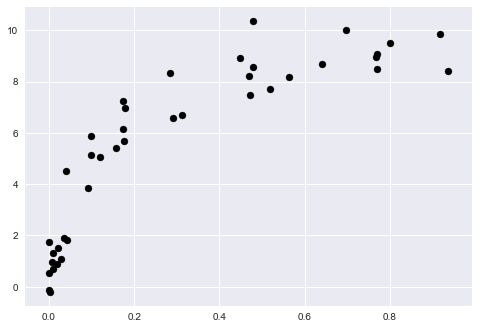

In [89]:
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()

for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
# plt.xlim(-0.1, 1.0)
# plt.ylim(-2, 12)
# plt.legend(loc='best');